<a href="https://colab.research.google.com/github/romanmarsalekBUT/MPA-MLF_materials/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
data=iris.data
target=iris.target
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size=0.2)
print(data_train.shape)
print(data_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(data_train,target_train)
SVMmodel.get_params()
SVMmodel.score(data_test,target_test)

0.9666666666666667

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
from sklearn.model_selection import train_test_split
data2 = data[target!=2,:2]
target2 = target[target!=2]

data_train2, data_test2, target_train2, target_test2 = train_test_split(data2,target2,test_size=0.2)
print(data_train2.shape)
print(data_test2.shape)

(80, 2)
(20, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

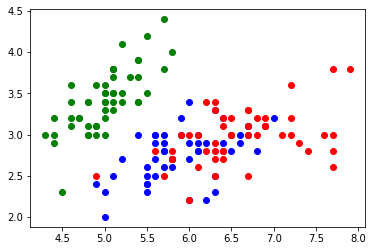

In [5]:
import matplotlib.pyplot as plot 
plot.scatter(data[target==0,0],data[target==0,1],c='green')
plot.scatter(data[target==1,0],data[target==1,1],c='blue')
plot.scatter(data[target==2,0],data[target==2,1],c='red')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [6]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear',C = 1)
SVMmodel.fit(data_train2,target_train2)
SVMmodel.get_params()
SVMmodel.score(data_test2,target_test2)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

(18, 2)


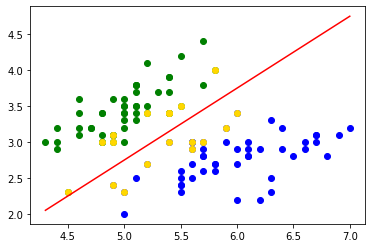

In [7]:
import numpy as np

supVecs=SVMmodel.support_vectors_
print(supVecs.shape)

plot.scatter(data2[target2==0,0],data2[target2==0,1],c='green')
plot.scatter(data2[target2==1,0],data2[target2==1,1],c='blue')

plot.scatter(supVecs[:,0],supVecs[:,1], c = 'gold')

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_



decLineX = np.linspace(min(data2[:,0]),max(data2[:,0]),100)
W = W.tolist()[0]
decLineY = -W[0]/W[1]*decLineX-b/W[1]
plot.plot(decLineX,decLineY, c = 'red')


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

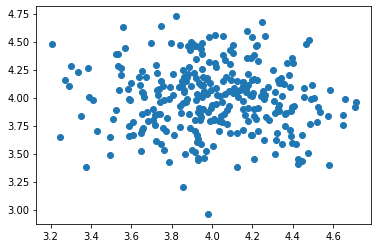

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
dataOC, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plot.scatter(dataOC[:,0], dataOC[:,1])
plot.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

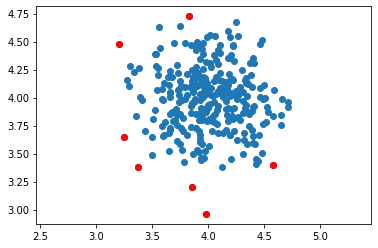

In [9]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(dataOC)
pred = SVMmodelOne.predict(dataOC)
anom_index = where(pred==-1)
values = dataOC[anom_index]

plot.scatter(dataOC[:,0], dataOC[:,1])
plot.scatter(values[:,0], values[:,1], color='red')
plot.axis('equal')
plot.show()



Plot the support vectors:

(10, 2)


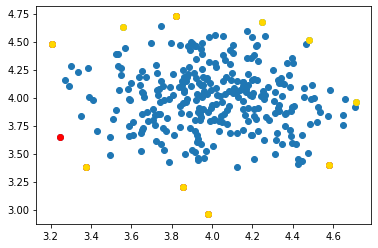

In [10]:
supVecsOC=SVMmodelOne.support_vectors_
print(supVecsOC.shape)

plot.scatter(dataOC[:,0], dataOC[:,1])
plot.scatter(values[:,0], values[:,1], color='red')
plot.scatter(supVecsOC[:,0],supVecsOC[:,1], c = 'gold')

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


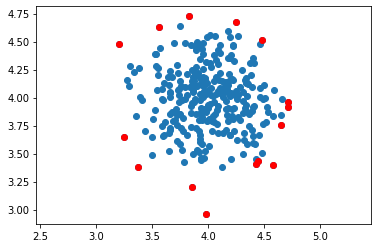

In [13]:
scores = SVMmodelOne.score_samples(dataOC)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = dataOC[index]

plot.scatter(dataOC[:,0], dataOC[:,1])
plot.scatter(values[:,0], values[:,1], color='red')
plot.axis('equal')
plot.show()